In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

connection_string = f"group5:Group5Project@nbastats2.c4lr0vlcqzd5.us-east-1.rds.amazonaws.com:5432/NBA_Stats"
engine = create_engine(f'postgresql://{connection_string}')

In [3]:
mvp = pd.read_csv("Data/AdvancedStats.csv")
# mvp["Player"] = mvp["Player"].str.split("\\", n=1, expand=True)[0]
# mvp["PlayerID"] = mvp["Player"].str.split("\\", n=1, expand=True)[1]
# mvp.drop("Player", axis = 1)
mvp = mvp.fillna(0)
mvp = mvp.drop("Rk", axis=1)
cols = mvp.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
mvp = mvp[cols]
mvp.head()

,VORP,Season,Player,Pos,Age,Tm,G,MP,PER,TS%,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM
0,-0.7,1989-90,Mark Acres,C,27,ORL,80,1691,8.3,0.536,...,0.8,17.2,9.4,1.1,0.6,1.6,0.047,-3.1,-0.6,-3.7
1,2.6,1989-90,Michael Adams,PG,27,DEN,79,2690,15.4,0.542,...,0.1,11.1,18.5,4.4,2.5,6.9,0.124,1.8,-0.1,1.8
2,1.5,1989-90,Mark Aguirre,SF,30,DET,78,2005,15.8,0.544,...,0.6,10.7,24.3,3.1,2.5,5.7,0.136,1.0,0.0,1.0
3,2.1,1989-90,Danny Ainge,PG,30,SAC,75,2727,16.1,0.528,...,0.4,12.7,23.0,2.7,2.1,4.8,0.085,1.2,-0.1,1.1
4,0.3,1989-90,Mark Alarie,PF,26,WSB,82,1893,14.1,0.510,...,1.2,10.7,20.4,1.5,1.6,3.1,0.079,-0.6,-0.7,-1.3


In [4]:
mvp = mvp[5409:]

In [5]:
mvp.head()

,VORP,Season,Player,Pos,Age,Tm,G,MP,PER,TS%,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM
5409,0.1,2000-01,Mahmoud Abdul-Rauf,PG,31,VAN,41,486,16.7,0.514,...,0.1,9.1,26.8,0.7,0.0,0.7,0.070,1.1,-2.1,-1.0
5410,-0.4,2000-01,Tariq Abdul-Wahad,SG,26,DEN,29,420,5.8,0.438,...,2.1,21.1,17.1,-0.7,0.3,-0.4,-0.049,-5.6,-0.3,-5.8
5411,3.1,2000-01,Shareef Abdur-Rahim,SF,24,VAN,81,3241,19.1,0.549,...,1.6,13.2,24.6,5.6,2.9,8.5,0.126,1.7,0.1,1.8
5412,-0.2,2000-01,Cory Alexander,PG,27,ORL,26,227,6.3,0.407,...,0.0,28.1,17.3,-0.5,0.3,-0.1,-0.031,-7.2,1.2,-6.0
5413,-0.8,2000-01,Courtney Alexander,PG,23,TOT,65,1382,11.6,0.484,...,0.3,10.5,23.2,0.3,0.5,0.8,0.027,-2.4,-1.9,-4.3


In [6]:
mvp_votes = pd.read_csv("Data/MVP.csv")
mvp_votes = mvp_votes[["Player", "Season"]]
mvp_votes["MVP_Candidate"] = 1
mvp_votes

,Player,Season,MVP_Candidate
0,Allen Iverson,2000-01,1
1,Tim Duncan,2000-01,1
2,Shaquille O'Neal,2000-01,1
3,Chris Webber,2000-01,1
4,Kevin Garnett,2000-01,1
...,...,...,...
266,Kevin Durant,2018-19,1
267,Kawhi Leonard,2018-19,1
268,Russell Westbrook,2018-19,1
269,Rudy Gobert,2018-19,1


In [7]:
mvp_2020 = mvp.loc[mvp["Season"] == "2019-20"]
mvp_2019 = mvp.loc[mvp["Season"] == "2018-19"]
mvp_2018 = mvp.loc[mvp["Season"] == "2017-18"]
mvp_2017 = mvp.loc[mvp["Season"] == "2016-17"]

In [8]:
mvp = mvp.loc[mvp["Season"] != "2019-20"]

In [9]:
mvp = pd.merge(mvp, mvp_votes, how='left', on=["Player", "Season"])
mvp["MVP_Candidate"] = mvp["MVP_Candidate"].fillna(0)
mvp.head()

,VORP,Season,Player,Pos,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,MVP_Candidate
0,0.1,2000-01,Mahmoud Abdul-Rauf,PG,31,VAN,41,486,16.7,0.514,...,9.1,26.8,0.7,0.0,0.7,0.070,1.1,-2.1,-1.0,0.0
1,-0.4,2000-01,Tariq Abdul-Wahad,SG,26,DEN,29,420,5.8,0.438,...,21.1,17.1,-0.7,0.3,-0.4,-0.049,-5.6,-0.3,-5.8,0.0
2,3.1,2000-01,Shareef Abdur-Rahim,SF,24,VAN,81,3241,19.1,0.549,...,13.2,24.6,5.6,2.9,8.5,0.126,1.7,0.1,1.8,0.0
3,-0.2,2000-01,Cory Alexander,PG,27,ORL,26,227,6.3,0.407,...,28.1,17.3,-0.5,0.3,-0.1,-0.031,-7.2,1.2,-6.0,0.0
4,-0.8,2000-01,Courtney Alexander,PG,23,TOT,65,1382,11.6,0.484,...,10.5,23.2,0.3,0.5,0.8,0.027,-2.4,-1.9,-4.3,0.0


In [10]:
mvp_2020 = pd.merge(mvp_2020, mvp_votes, how='left', on=["Player", "Season"])
mvp_2019 = pd.merge(mvp_2019, mvp_votes, how='left', on=["Player", "Season"])
mvp_2018 = pd.merge(mvp_2018, mvp_votes, how='left', on=["Player", "Season"])
mvp_2017 = pd.merge(mvp_2017, mvp_votes, how='left', on=["Player", "Season"])

In [11]:
X = mvp[["MP", "USG%", "DWS", "VORP"]]
Xx = mvp_2020[["MP", "USG%", "DWS", "VORP"]]
X_2019 = mvp_2019[["MP", "USG%", "DWS", "VORP"]]
X_2018 = mvp_2018[["MP", "USG%", "DWS", "VORP"]]
X_2017 = mvp_2017[["MP", "USG%", "DWS", "VORP"]]
y = mvp["MVP_Candidate"]
y = y.values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

X_scaler1 = StandardScaler().fit(X_train1)
y_scaler1 = StandardScaler().fit(y_train1)

In [14]:
X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)
Xx_test_scaled = X_scaler1.transform(Xx)
X_2019_test_scaled = X_scaler1.transform(X_2019)
X_2018_test_scaled = X_scaler1.transform(X_2018)
X_2017_test_scaled = X_scaler1.transform(X_2017)
y_train_scaled1 = y_scaler1.transform(y_train1)
y_test_scaled1 = y_scaler1.transform(y_test1)

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler_rf = MinMaxScaler().fit(X_train1)
X_train_scaled_rf = X_scaler1.transform(X_train1)
X_test_scaled_rf = X_scaler1.transform(X_test1)
Xx_test_scaled_rf = X_scaler1.transform(Xx)
X_2019_test_scaled_rf = X_scaler1.transform(X_2019)
X_2018_test_scaled_rf = X_scaler1.transform(X_2018)
X_2017_test_scaled_rf = X_scaler1.transform(X_2017)

label_encoder = LabelEncoder()
label_encoder.fit(y_train1)
encoded_y_train = label_encoder.transform(y_train1)
encoded_y_test = label_encoder.transform(y_test1)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled_rf, encoded_y_train)

print(f"Training Data Score: {rf.score(X_train_scaled_rf, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled_rf, encoded_y_test)}")

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Data Score: 1.0
Testing Data Score: 0.9877256317689531


In [16]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [400, 700, 1000]
}
grid2 = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=3)

grid2.fit(X_train_scaled_rf, encoded_y_train)

print(grid2.best_params_)
print(grid2.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=400, score=0.989, total=   3.3s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.984, total=   3.5s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.983, total=   3.2s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.986, total=   3.3s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.986, total=   3.2s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.989, total=   5.4s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.984, total=   5.8s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.983, total=   5.6s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.987, total=   5.7s
[CV] n_estimators=700 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished


{'n_estimators': 700}
0.9856799037304453


In [17]:
# SVC Prediction for 2017
predictions_2017 = grid2.predict(X_2017_test_scaled_rf)

# SVC Prediction for 2018
predictions_2018 = grid2.predict(X_2018_test_scaled_rf)

# SVC Prediction for 2019
predictions1 = grid2.predict(X_2019_test_scaled_rf)

# SVC Prediction for 2020
predictions2 = grid2.predict(Xx_test_scaled_rf)

In [18]:
names_list1 = []
season_list1 = []
team_list1 = []
model_list1 = []

In [19]:
# 2017
found = 0
for i in range(len(predictions_2017)):
    if predictions_2017[i] == 1:
        found = 1
        print(i,mvp_2017.iloc[i,2], mvp_2017.iloc[i,1], mvp_2017.iloc[i,5])
        names_list1.append(mvp_2017.iloc[i,2])
        season_list1.append(mvp_2017.iloc[i,1])
        team_list1.append(mvp_2017.iloc[i,5])
        model_list1.append("Advanced Stats Random Forest")
if found == 0:
    print("No Candidates")

19 Giannis Antetokounmpo 2016-17 MIL
79 Jimmy Butler 2016-17 CHI
120 Stephen Curry 2016-17 GSW
122 Anthony Davis 2016-17 NOP
143 Kevin Durant 2016-17 GSW
210 James Harden 2016-17 HOU
225 Gordon Hayward 2016-17 UTA
269 LeBron James 2016-17 CLE
318 Kawhi Leonard 2016-17 SAS
516 Isaiah Thomas 2016-17 BOS
550 John Wall 2016-17 WAS
558 Russell Westbrook 2016-17 OKC


In [20]:
# 2018
found = 0
for i in range(len(predictions_2018)):
    if predictions_2018[i] == 1:
        found = 1
        print(i,mvp_2018.iloc[i,2], mvp_2018.iloc[i,1], mvp_2018.iloc[i,5])
        names_list1.append(mvp_2018.iloc[i,2])
        season_list1.append(mvp_2018.iloc[i,1])
        team_list1.append(mvp_2018.iloc[i,5])
        model_list1.append("Advanced Stats Random Forest")
if found == 0:
    print("No Candidates")

6 LaMarcus Aldridge 2017-18 SAS
15 Giannis Antetokounmpo 2017-18 MIL
93 Jimmy Butler 2017-18 MIN
146 Stephen Curry 2017-18 GSW
148 Anthony Davis 2017-18 NOP
156 DeMar DeRozan 2017-18 TOR
171 Kevin Durant 2017-18 GSW
177 Joel Embiid 2017-18 PHI
232 James Harden 2017-18 HOU
292 Kyrie Irving 2017-18 BOS
303 LeBron James 2017-18 CLE
324 Nikola Jokić 2017-18 DEN
369 Damian Lillard 2017-18 POR
472 Victor Oladipo 2017-18 IND
625 Russell Westbrook 2017-18 OKC


In [21]:
# 2019
found = 0
for i in range(len(predictions1)):
    if predictions1[i] == 1:
        found = 1
        print(i,mvp_2019.iloc[i,2], mvp_2019.iloc[i,1], mvp_2019.iloc[i,5])
        names_list1.append(mvp_2019.iloc[i,2])
        season_list1.append(mvp_2019.iloc[i,1])
        team_list1.append(mvp_2019.iloc[i,5])
        model_list1.append("Advanced Stats Random Forest")
if found == 0:
    print("No Candidates")

19 Giannis Antetokounmpo 2018-19 MIL
159 Stephen Curry 2018-19 GSW
191 Kevin Durant 2018-19 GSW
200 Joel Embiid 2018-19 PHI
240 Paul George 2018-19 OKC
244 Rudy Gobert 2018-19 UTA
261 Blake Griffin 2018-19 DET
267 James Harden 2018-19 HOU
332 LeBron James 2018-19 LAL
397 Kawhi Leonard 2018-19 TOR
401 Damian Lillard 2018-19 POR
647 Karl-Anthony Towns 2018-19 MIN
675 Russell Westbrook 2018-19 OKC


In [22]:
# 2020
found = 0
for i in range(len(predictions2)):
    if predictions2[i] == 1:
        found = 1
        print(i,mvp_2020.iloc[i,2], mvp_2020.iloc[i,1], mvp_2020.iloc[i,5])
        names_list1.append(mvp_2020.iloc[i,2])
        season_list1.append(mvp_2020.iloc[i,1])
        team_list1.append(mvp_2020.iloc[i,5])
        model_list1.append("Advanced Stats Random Forest")
if found == 0:
    print("No Candidates")

11 Giannis Antetokounmpo 2019-20 MIL
156 Anthony Davis 2019-20 LAL
171 Luka Dončić 2019-20 DAL
251 James Harden 2019-20 HOU
313 LeBron James 2019-20 LAL
367 Kawhi Leonard 2019-20 LAC


In [23]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_rf, encoded_y_train)
    train_score = knn.score(X_train_scaled_rf, encoded_y_train)
    test_score = knn.score(X_test_scaled_rf, encoded_y_test)
    #knn.fit(X_train_scaled, encoded_y_train)
    #train_score = knn.score(X_train_scaled,encoded_y_train)
    #test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled_rf, encoded_y_train)
print('Test Acc: %.3f' % knn.score(X_test_scaled_rf, encoded_y_test))
print(f"Training Data Score: {knn.score(X_train_scaled_rf, encoded_y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled_rf, encoded_y_test)}")

k: 1, Train/Test Score: 1.000/0.983
k: 3, Train/Test Score: 0.990/0.985
k: 5, Train/Test Score: 0.989/0.986
k: 7, Train/Test Score: 0.988/0.987
k: 9, Train/Test Score: 0.988/0.988
k: 11, Train/Test Score: 0.988/0.988
k: 13, Train/Test Score: 0.988/0.987
k: 15, Train/Test Score: 0.988/0.987
k: 17, Train/Test Score: 0.987/0.987
k: 19, Train/Test Score: 0.987/0.987
Test Acc: 0.987
Training Data Score: 0.9876052948255114
Testing Data Score: 0.9873646209386282


In [24]:
#2017
predictions3 = knn.predict(X_2017_test_scaled_rf)
#2018
predictions4 = knn.predict(X_2018_test_scaled_rf)
#2019
predictions1 = knn.predict(X_2019_test_scaled_rf)
#2020
predictions2 = knn.predict(Xx_test_scaled_rf)

In [25]:
for i in range(len(predictions3)):
    if predictions3[i] == 1:
        print(i,mvp_2017.iloc[i,2],mvp_2017.iloc[i,1],mvp_2017.iloc[i,5])
        names_list1.append(mvp_2017.iloc[i,2])
        season_list1.append(mvp_2017.iloc[i,1])
        team_list1.append(mvp_2017.iloc[i,5])
        model_list1.append("Advanced Stats KNN")

19 Giannis Antetokounmpo 2016-17 MIL
79 Jimmy Butler 2016-17 CHI
110 DeMarcus Cousins 2016-17 TOT
111 DeMarcus Cousins 2016-17 SAC
120 Stephen Curry 2016-17 GSW
122 Anthony Davis 2016-17 NOP
143 Kevin Durant 2016-17 GSW
210 James Harden 2016-17 HOU
225 Gordon Hayward 2016-17 UTA
269 LeBron James 2016-17 CLE
318 Kawhi Leonard 2016-17 SAS
516 Isaiah Thomas 2016-17 BOS
529 Karl-Anthony Towns 2016-17 MIN
550 John Wall 2016-17 WAS
558 Russell Westbrook 2016-17 OKC


In [26]:
for i in range(len(predictions4)):
    if predictions4[i] == 1:
        print(i,mvp_2018.iloc[i,2],mvp_2018.iloc[i,1],mvp_2018.iloc[i,5])
        names_list1.append(mvp_2018.iloc[i,2])
        season_list1.append(mvp_2018.iloc[i,1])
        team_list1.append(mvp_2018.iloc[i,5])
        model_list1.append("Advanced Stats KNN")

15 Giannis Antetokounmpo 2017-18 MIL
148 Anthony Davis 2017-18 NOP
171 Kevin Durant 2017-18 GSW
232 James Harden 2017-18 HOU
292 Kyrie Irving 2017-18 BOS
303 LeBron James 2017-18 CLE
324 Nikola Jokić 2017-18 DEN
369 Damian Lillard 2017-18 POR
472 Victor Oladipo 2017-18 IND
625 Russell Westbrook 2017-18 OKC


In [27]:
for i in range(len(predictions1)):
    if predictions1[i] == 1:
        print(i,mvp_2019.iloc[i,2],mvp_2019.iloc[i,1],mvp_2019.iloc[i,5])
        names_list1.append(mvp_2019.iloc[i,2])
        season_list1.append(mvp_2019.iloc[i,1])
        team_list1.append(mvp_2019.iloc[i,5])
        model_list1.append("Advanced Stats KNN")

19 Giannis Antetokounmpo 2018-19 MIL
159 Stephen Curry 2018-19 GSW
161 Anthony Davis 2018-19 NOP
191 Kevin Durant 2018-19 GSW
200 Joel Embiid 2018-19 PHI
240 Paul George 2018-19 OKC
261 Blake Griffin 2018-19 DET
267 James Harden 2018-19 HOU
321 Kyrie Irving 2018-19 BOS
332 LeBron James 2018-19 LAL
353 Nikola Jokić 2018-19 DEN
397 Kawhi Leonard 2018-19 TOR
401 Damian Lillard 2018-19 POR
647 Karl-Anthony Towns 2018-19 MIN
661 Nikola Vučević 2018-19 ORL
675 Russell Westbrook 2018-19 OKC


In [28]:
for i in range(len(predictions2)):
    if predictions2[i] == 1:
        print(i,mvp_2020.iloc[i,2],mvp_2020.iloc[i,1],mvp_2020.iloc[i,5])
        names_list1.append(mvp_2020.iloc[i,2])
        season_list1.append(mvp_2020.iloc[i,1])
        team_list1.append(mvp_2020.iloc[i,5])
        model_list1.append("Advanced Stats KNN")

11 Giannis Antetokounmpo 2019-20 MIL
156 Anthony Davis 2019-20 LAL
171 Luka Dončić 2019-20 DAL
251 James Harden 2019-20 HOU
313 LeBron James 2019-20 LAL
328 Nikola Jokić 2019-20 DEN
367 Kawhi Leonard 2019-20 LAC


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=8, activation='relu', input_dim=4))
deep_model.add(Dense(units=8, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

deep_model.summary()

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled_rf,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)


model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled_rf,y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
Train on 8310 samples
Epoch 1/1000
8310/8310 - 2s - loss: 0.2767 - accuracy: 0.9693
Epoch 2/1000
8310/8310 - 0s - loss: 0.0986 - accuracy: 0.9748
Epoch 3/1000
8310/8310 - 0s - loss: 0.0668 - accuracy: 0.9810
Epoch 4/1000
8310/8310 - 0s - loss: 0.0533 - accuracy: 0.9839
Epoch 5/1000
8310/8310 - 0s - loss: 0.0469 - accuracy: 0.9848
Epoch 6/1000
8310/8310 - 0s - loss: 0.0433 - accuracy: 0

Epoch 119/1000
8310/8310 - 0s - loss: 0.0339 - accuracy: 0.9864
Epoch 120/1000
8310/8310 - 0s - loss: 0.0340 - accuracy: 0.9866
Epoch 121/1000
8310/8310 - 0s - loss: 0.0337 - accuracy: 0.9875
Epoch 122/1000
8310/8310 - 0s - loss: 0.0338 - accuracy: 0.9871
Epoch 123/1000
8310/8310 - 0s - loss: 0.0339 - accuracy: 0.9866
Epoch 124/1000
8310/8310 - 1s - loss: 0.0340 - accuracy: 0.9868
Epoch 125/1000
8310/8310 - 0s - loss: 0.0338 - accuracy: 0.9871
Epoch 126/1000
8310/8310 - 0s - loss: 0.0335 - accuracy: 0.9866
Epoch 127/1000
8310/8310 - 0s - loss: 0.0339 - accuracy: 0.9870
Epoch 128/1000
8310/8310 - 0s - loss: 0.0338 - accuracy: 0.9872
Epoch 129/1000
8310/8310 - 0s - loss: 0.0339 - accuracy: 0.9866
Epoch 130/1000
8310/8310 - 0s - loss: 0.0337 - accuracy: 0.9869
Epoch 131/1000
8310/8310 - 0s - loss: 0.0336 - accuracy: 0.9876
Epoch 132/1000
8310/8310 - 0s - loss: 0.0337 - accuracy: 0.9870
Epoch 133/1000
8310/8310 - 0s - loss: 0.0336 - accuracy: 0.9866
Epoch 134/1000
8310/8310 - 0s - loss: 0.

8310/8310 - 1s - loss: 0.0330 - accuracy: 0.9878
Epoch 248/1000
8310/8310 - 0s - loss: 0.0330 - accuracy: 0.9872
Epoch 249/1000
8310/8310 - 0s - loss: 0.0332 - accuracy: 0.9872
Epoch 250/1000
8310/8310 - 0s - loss: 0.0330 - accuracy: 0.9876
Epoch 251/1000
8310/8310 - 0s - loss: 0.0330 - accuracy: 0.9878
Epoch 252/1000
8310/8310 - 1s - loss: 0.0328 - accuracy: 0.9881
Epoch 253/1000
8310/8310 - 0s - loss: 0.0329 - accuracy: 0.9877
Epoch 254/1000
8310/8310 - 0s - loss: 0.0332 - accuracy: 0.9876
Epoch 255/1000
8310/8310 - 0s - loss: 0.0327 - accuracy: 0.9874
Epoch 256/1000
8310/8310 - 0s - loss: 0.0331 - accuracy: 0.9871
Epoch 257/1000
8310/8310 - 0s - loss: 0.0329 - accuracy: 0.9878
Epoch 258/1000
8310/8310 - 0s - loss: 0.0332 - accuracy: 0.9866
Epoch 259/1000
8310/8310 - 0s - loss: 0.0329 - accuracy: 0.9877
Epoch 260/1000
8310/8310 - 0s - loss: 0.0329 - accuracy: 0.9872
Epoch 261/1000
8310/8310 - 0s - loss: 0.0329 - accuracy: 0.9871
Epoch 262/1000
8310/8310 - 0s - loss: 0.0329 - accuracy

Epoch 376/1000
8310/8310 - 1s - loss: 0.0328 - accuracy: 0.9875
Epoch 377/1000
8310/8310 - 1s - loss: 0.0326 - accuracy: 0.9882
Epoch 378/1000
8310/8310 - 1s - loss: 0.0323 - accuracy: 0.9881
Epoch 379/1000
8310/8310 - 1s - loss: 0.0325 - accuracy: 0.9881
Epoch 380/1000
8310/8310 - 1s - loss: 0.0325 - accuracy: 0.9878
Epoch 381/1000
8310/8310 - 1s - loss: 0.0324 - accuracy: 0.9883
Epoch 382/1000
8310/8310 - 1s - loss: 0.0328 - accuracy: 0.9875
Epoch 383/1000
8310/8310 - 1s - loss: 0.0325 - accuracy: 0.9877
Epoch 384/1000
8310/8310 - 1s - loss: 0.0326 - accuracy: 0.9881
Epoch 385/1000
8310/8310 - 1s - loss: 0.0328 - accuracy: 0.9878
Epoch 386/1000
8310/8310 - 1s - loss: 0.0324 - accuracy: 0.9872
Epoch 387/1000
8310/8310 - 1s - loss: 0.0325 - accuracy: 0.9878
Epoch 388/1000
8310/8310 - 1s - loss: 0.0325 - accuracy: 0.9878
Epoch 389/1000
8310/8310 - 1s - loss: 0.0322 - accuracy: 0.9877
Epoch 390/1000
8310/8310 - 1s - loss: 0.0326 - accuracy: 0.9875
Epoch 391/1000
8310/8310 - 1s - loss: 0.

8310/8310 - 0s - loss: 0.0321 - accuracy: 0.9872
Epoch 505/1000
8310/8310 - 0s - loss: 0.0322 - accuracy: 0.9869
Epoch 506/1000
8310/8310 - 0s - loss: 0.0322 - accuracy: 0.9880
Epoch 507/1000
8310/8310 - 0s - loss: 0.0322 - accuracy: 0.9874
Epoch 508/1000
8310/8310 - 0s - loss: 0.0321 - accuracy: 0.9877
Epoch 509/1000
8310/8310 - 0s - loss: 0.0323 - accuracy: 0.9870
Epoch 510/1000
8310/8310 - 0s - loss: 0.0319 - accuracy: 0.9878
Epoch 511/1000
8310/8310 - 1s - loss: 0.0322 - accuracy: 0.9877
Epoch 512/1000
8310/8310 - 1s - loss: 0.0320 - accuracy: 0.9875
Epoch 513/1000
8310/8310 - 1s - loss: 0.0322 - accuracy: 0.9878
Epoch 514/1000
8310/8310 - 0s - loss: 0.0322 - accuracy: 0.9878
Epoch 515/1000
8310/8310 - 0s - loss: 0.0320 - accuracy: 0.9875
Epoch 516/1000
8310/8310 - 1s - loss: 0.0323 - accuracy: 0.9874
Epoch 517/1000
8310/8310 - 0s - loss: 0.0322 - accuracy: 0.9875
Epoch 518/1000
8310/8310 - 0s - loss: 0.0321 - accuracy: 0.9882
Epoch 519/1000
8310/8310 - 0s - loss: 0.0321 - accuracy

Epoch 633/1000
8310/8310 - 1s - loss: 0.0320 - accuracy: 0.9872
Epoch 634/1000
8310/8310 - 1s - loss: 0.0318 - accuracy: 0.9871
Epoch 635/1000
8310/8310 - 1s - loss: 0.0319 - accuracy: 0.9875
Epoch 636/1000
8310/8310 - 1s - loss: 0.0315 - accuracy: 0.9878
Epoch 637/1000
8310/8310 - 0s - loss: 0.0318 - accuracy: 0.9869
Epoch 638/1000
8310/8310 - 0s - loss: 0.0320 - accuracy: 0.9881
Epoch 639/1000
8310/8310 - 0s - loss: 0.0319 - accuracy: 0.9874
Epoch 640/1000
8310/8310 - 0s - loss: 0.0316 - accuracy: 0.9880
Epoch 641/1000
8310/8310 - 0s - loss: 0.0319 - accuracy: 0.9877
Epoch 642/1000
8310/8310 - 0s - loss: 0.0318 - accuracy: 0.9875
Epoch 643/1000
8310/8310 - 0s - loss: 0.0323 - accuracy: 0.9871
Epoch 644/1000
8310/8310 - 0s - loss: 0.0316 - accuracy: 0.9875
Epoch 645/1000
8310/8310 - 0s - loss: 0.0317 - accuracy: 0.9874
Epoch 646/1000
8310/8310 - 0s - loss: 0.0319 - accuracy: 0.9872
Epoch 647/1000
8310/8310 - 0s - loss: 0.0317 - accuracy: 0.9877
Epoch 648/1000
8310/8310 - 0s - loss: 0.

8310/8310 - 1s - loss: 0.0315 - accuracy: 0.9874
Epoch 762/1000
8310/8310 - 1s - loss: 0.0311 - accuracy: 0.9887
Epoch 763/1000
8310/8310 - 1s - loss: 0.0315 - accuracy: 0.9881
Epoch 764/1000
8310/8310 - 1s - loss: 0.0316 - accuracy: 0.9868
Epoch 765/1000
8310/8310 - 1s - loss: 0.0318 - accuracy: 0.9869
Epoch 766/1000
8310/8310 - 0s - loss: 0.0320 - accuracy: 0.9871
Epoch 767/1000
8310/8310 - 1s - loss: 0.0313 - accuracy: 0.9872
Epoch 768/1000
8310/8310 - 0s - loss: 0.0315 - accuracy: 0.9870
Epoch 769/1000
8310/8310 - 0s - loss: 0.0312 - accuracy: 0.9882
Epoch 770/1000
8310/8310 - 1s - loss: 0.0317 - accuracy: 0.9864
Epoch 771/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9874
Epoch 772/1000
8310/8310 - 1s - loss: 0.0314 - accuracy: 0.9877
Epoch 773/1000
8310/8310 - 1s - loss: 0.0316 - accuracy: 0.9882
Epoch 774/1000
8310/8310 - 1s - loss: 0.0316 - accuracy: 0.9875
Epoch 775/1000
8310/8310 - 0s - loss: 0.0315 - accuracy: 0.9877
Epoch 776/1000
8310/8310 - 0s - loss: 0.0320 - accuracy

Epoch 890/1000
8310/8310 - 0s - loss: 0.0313 - accuracy: 0.9870
Epoch 891/1000
8310/8310 - 0s - loss: 0.0308 - accuracy: 0.9871
Epoch 892/1000
8310/8310 - 0s - loss: 0.0312 - accuracy: 0.9877
Epoch 893/1000
8310/8310 - 0s - loss: 0.0317 - accuracy: 0.9866
Epoch 894/1000
8310/8310 - 0s - loss: 0.0310 - accuracy: 0.9878
Epoch 895/1000
8310/8310 - 0s - loss: 0.0312 - accuracy: 0.9874
Epoch 896/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9876
Epoch 897/1000
8310/8310 - 0s - loss: 0.0310 - accuracy: 0.9872
Epoch 898/1000
8310/8310 - 0s - loss: 0.0313 - accuracy: 0.9870
Epoch 899/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9877
Epoch 900/1000
8310/8310 - 0s - loss: 0.0310 - accuracy: 0.9880
Epoch 901/1000
8310/8310 - 0s - loss: 0.0309 - accuracy: 0.9877
Epoch 902/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9876
Epoch 903/1000
8310/8310 - 0s - loss: 0.0311 - accuracy: 0.9875
Epoch 904/1000
8310/8310 - 1s - loss: 0.0309 - accuracy: 0.9888
Epoch 905/1000
8310/8310 - 1s - loss: 0.

In [30]:
ynew3 = deep_model.predict_classes(X_2017_test_scaled_rf)
for i in range(len(X_2017_test_scaled_rf)):
    if (ynew3[i] == 1):
        print(i,"X=%s, Predicted=%s" % (X_2017_test_scaled_rf[i], ynew3[i]),mvp_2017.iloc[i,2])
        names_list1.append(mvp_2017.iloc[i,2])
        season_list1.append(mvp_2017.iloc[i,1])
        team_list1.append(mvp_2017.iloc[i,5])
        model_list1.append("Advanced Stats Deep Learning")

19 X=[1.96271685 1.78396806 2.93195158 4.90002923], Predicted=1 Giannis Antetokounmpo
79 X=[1.9222529  1.45340799 2.32767501 4.82065665], Predicted=1 Jimmy Butler
110 X=[1.53559739 3.28985284 2.32767501 3.94755831], Predicted=1 DeMarcus Cousins
120 X=[1.73004914 2.11452813 2.41400023 4.26504862], Predicted=1 Stephen Curry
122 X=[1.80872904 2.57363935 3.44990292 3.86818574], Predicted=1 Anthony Davis
130 X=[1.70981717 2.88583497 1.11912187 2.20136163], Predicted=1 DeMar DeRozan
143 X=[1.09161795 1.69214582 2.50032546 4.10630347], Predicted=1 Kevin Durant
210 X=[2.0773647  2.86747053 2.15502456 5.93187272], Predicted=1 James Harden
269 X=[1.90539292 2.09616369 1.63707321 4.90002923], Predicted=1 LeBron James
318 X=[1.54571338 2.29817262 3.10460203 5.21751953], Predicted=1 Kawhi Leonard
516 X=[1.65249324 2.83074163 0.42852008 4.02693089], Predicted=1 Isaiah Thomas
550 X=[1.95260086 2.20635038 1.63707321 3.39195028], Predicted=1 John Wall
558 X=[1.91438491 4.24480417 3.0182768  6.96371621]

In [31]:
ynew2 = deep_model.predict_classes(X_2018_test_scaled_rf)
for i in range(len(X_2018_test_scaled_rf)):
    if (ynew2[i] == 1):
        print(i,"X=%s, Predicted=%s" % (X_2018_test_scaled_rf[i], ynew2[i]),mvp_2018.iloc[i,2])
        names_list1.append(mvp_2018.iloc[i,2])
        season_list1.append(mvp_2018.iloc[i,1])
        team_list1.append(mvp_2018.iloc[i,5])
        model_list1.append("Advanced Stats Deep Learning")

15 X=[1.86268097 2.31653707 2.15502456 4.10630347], Predicted=1 Giannis Antetokounmpo
146 X=[0.59818257 2.27980817 0.68749575 2.75696967], Predicted=1 Stephen Curry
148 X=[1.83008502 2.09616369 3.27725247 4.26504862], Predicted=1 Anthony Davis
171 X=[1.37823759 2.16962148 1.55074799 3.94755831], Predicted=1 Kevin Durant
232 X=[1.63226127 3.21639505 2.32767501 5.69375499], Predicted=1 James Harden
292 X=[0.93538215 2.27980817 1.37809754 3.15383255], Predicted=1 Kyrie Irving
303 X=[2.16616059 2.38999486 1.63707321 6.09061787], Predicted=1 LeBron James
324 X=[1.51086942 1.03102567 1.55074799 3.94755831], Predicted=1 Nikola Jokić
369 X=[1.7660171  2.20635038 1.37809754 4.58253892], Predicted=1 Damian Lillard
472 X=[1.63338527 2.11452813 2.50032546 3.55069543], Predicted=1 Victor Oladipo
625 X=[2.04027275 2.84910608 2.93195158 4.42379377], Predicted=1 Russell Westbrook


In [32]:
ynew1 = deep_model.predict_classes(X_2019_test_scaled_rf)
for i in range(len(X_2019_test_scaled_rf)):
    if (ynew1[i] == 1):
        print(i,"X=%s, Predicted=%s" % (X_2019_test_scaled_rf[i], ynew1[i]),mvp_2019.iloc[i,2])
        names_list1.append(mvp_2019.iloc[i,2])
        season_list1.append(mvp_2019.iloc[i,1])
        team_list1.append(mvp_2019.iloc[i,5])
        model_list1.append("Advanced Stats Deep Learning")

19 X=[1.41532954 2.518546   3.79520382 5.45563726], Predicted=1 Giannis Antetokounmpo
159 X=[1.38498158 2.16962148 1.20544709 3.63006801], Predicted=1 Stephen Curry
191 X=[1.80198505 1.9125192  1.55074799 3.63006801], Predicted=1 Kevin Durant
200 X=[1.18603383 2.70219049 2.32767501 2.59822451], Predicted=1 Joel Embiid
240 X=[1.95822085 2.00434144 3.27725247 4.82065665], Predicted=1 Paul George
261 X=[1.71206517 2.13289258 1.55074799 3.3125777 ], Predicted=1 Blake Griffin
267 X=[1.98744482 4.02443079 2.32767501 6.96371621], Predicted=1 James Harden
321 X=[1.25347375 2.02270589 1.55074799 3.63006801], Predicted=1 Kyrie Irving
332 X=[0.94212614 2.38999486 1.29177232 3.47132285], Predicted=1 LeBron James
353 X=[1.57943333 1.61868802 2.75930113 5.13814696], Predicted=1 Nikola Jokić
397 X=[1.05789799 2.15125703 1.98237411 3.3125777 ], Predicted=1 Kawhi Leonard
401 X=[1.95484886 1.96761255 1.11912187 4.34442119], Predicted=1 Damian Lillard
573 X=[1.51648941 2.44508821 1.29177232 2.28073421], 

In [33]:
ynew = deep_model.predict_classes(Xx_test_scaled_rf)
for i in range(len(Xx_test_scaled_rf)):
    if (ynew[i] == 1):
        print(i,"X=%s, Predicted=%s" % (Xx_test_scaled_rf[i], ynew[i]),mvp_2020.iloc[i,2])
        names_list1.append(mvp_2020.iloc[i,2])
        season_list1.append(mvp_2020.iloc[i,1])
        team_list1.append(mvp_2020.iloc[i,5])
        model_list1.append("Advanced Stats Deep Learning")

156 X=[0.96797811 2.00434144 2.6729759  3.70944058], Predicted=1 Anthony Davis
251 X=[1.33327764 3.25312395 1.37809754 4.74128408], Predicted=1 James Harden
313 X=[1.19614982 2.37163041 2.06869933 4.10630347], Predicted=1 LeBron James


In [34]:
df = pd.DataFrame({'Player': names_list1, 'season': season_list1, 'Tm': team_list1, 'model': model_list1})
df.to_sql(name='mvp_predictions2', con=engine, if_exists='append', index=False)

<function matplotlib.pyplot.show(*args, **kw)>

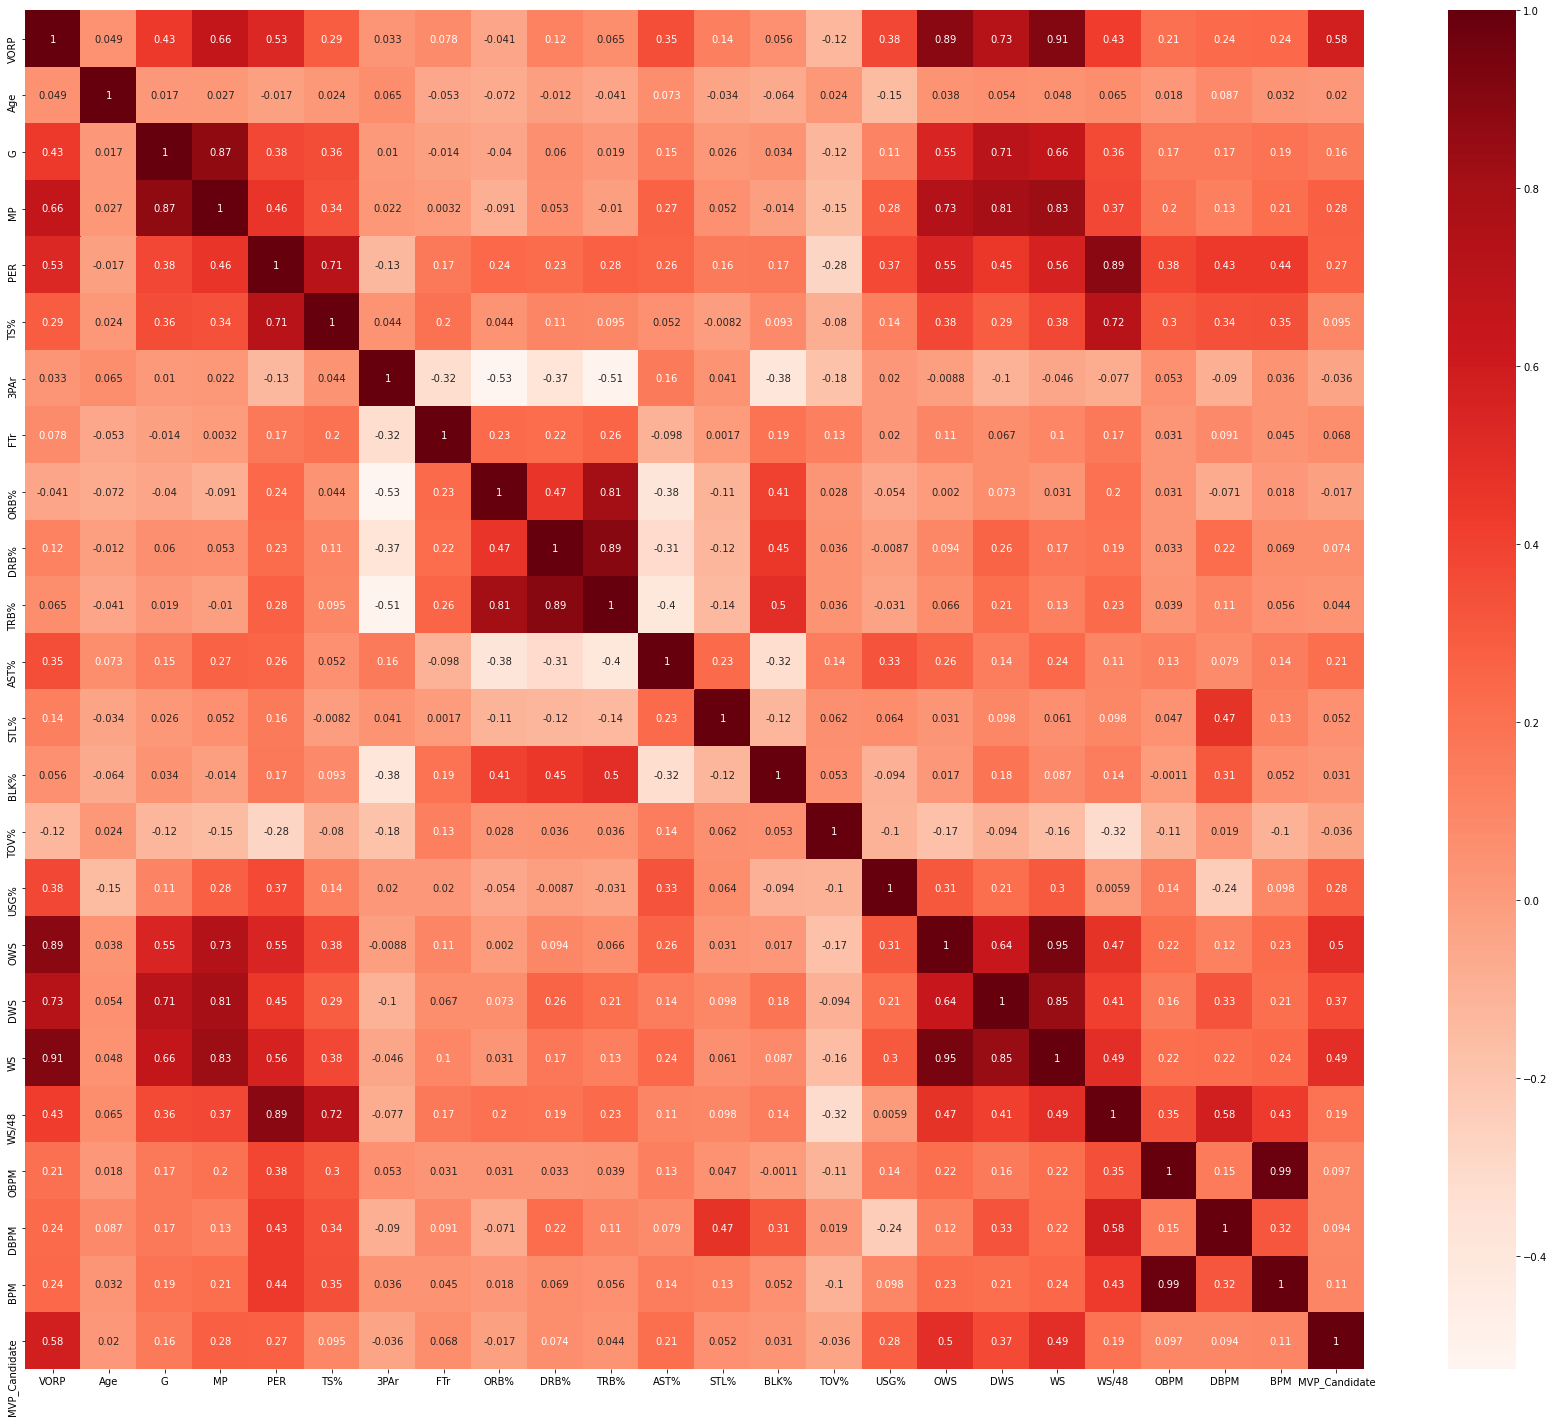

In [35]:
import seaborn as sns
import statsmodels.api as sm

plt.figure(figsize=(30,25))
cor = mvp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show

In [39]:
cor_target = abs(cor["MVP_Candidate"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

VORP             0.584096
MP               0.283014
PER              0.273216
USG%             0.281644
OWS              0.496649
DWS              0.370836
WS               0.493383
MVP_Candidate    1.000000
Name: MVP_Candidate, dtype: float64

In [37]:
print(mvp[["VORP","USG%"]].corr())
print(mvp[["VORP","PER"]].corr())

          VORP      USG%
VORP  1.000000  0.378137
USG%  0.378137  1.000000
          VORP       PER
VORP  1.000000  0.531578
PER   0.531578  1.000000
